# Horoscopes: Fact or Fiction?

By Katherine Li

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns

from dateutil.parser import parse
from matplotlib import pyplot as plt
from tqdm import tqdm

## Introduction

If you've ever taken an online quiz, been on a dating app, or read a tabloid, you've probably seen horoscopes before. Horoscopes usually claim to know what's in your future or what types of other people you will be compatible with. To many, horoscopes can be fun or even comforting: we have trouble predicting the future or knowing how a relationship will play out. Wouldn't it be much easier if it was all written in the stars already and we could know what to expect? Plus, it can feel good to be part of a "group" based on your birth date--you can call yourself a Libra, or a Scorpio, and other people can understand some of your personality traits or share that they are also part of the same group.

Personally, I don't believe in horoscopes very much. I don't see why what star someone is born under or what star is currently in the sky would influence their future. But I can't deny that sometimes, my horoscope does seem to describe me correctly. I wondered if there really is some truth to horoscopes after all? Or if it's not the stars or the skies that are influencing our futures, could it be possible that the year, month, or day someone is born on could influence their personality (perhaps due to being born in the winter or the summer or starting school at a different age)?

<img src=https://www.boredpanda.com/blog/wp-content/uploads/2018/12/funny-zodiac-memes-2-5c07aae60504d__700.jpg  width = 400>

Horoscopes tend to be as vague and broad as possible, which makes it easier for them to seem correct for a large amount of people. In order to test whether horoscope predictions were correct, I needed to find a subject on which horoscopes gave concrete predictions. Fortunately, astrologers often do just that for compatibility between two people for a relationship: one of the most famous ways horoscopes are used are to test whether two people might make a good pair (hence their copious use on dating apps). Combine that with a dataset of marriages and divorces that includes the birth date for each of the two people in the pair, and I have a way to test whether or not horoscope compatibility is real or not using probability!

## The "Predictions"

A cursory glance using Google images at zodiac compatibility charts created by astrologers shows me that there are a lot of interpretations of compatibility between zodiac signs out there, and not all of them agree. Because my dataset has only heterosexual relationships with male/female pairings, I chose a compatibility chart that also reflects this. 

The compability chart below comes from zodiac12signs.com, a blog that claims to be run by professional astrologers. The site claims that "the characteristics of the zodiac signs are highly accurate, almost 80%-90%" and that "it is safe to say that astrology knows more about us than we ourselves." Let's see if we can test this claim!

<img src=https://zodiac12signs.com/wp-content/uploads/2022/07/Zodiac-Signs-Compatibility-Chart.jpg  width = 600>

## The Data

My data for this task comes from the Mexican government in the city of Xalapa, Mexico. Xalapa has released a public register of marriages and divorces in the city between 2000 and 2015, and this register is special in that it includes the birth dates of both partners in the marriage, which can help us determine the zodiac signs of the partners involved. 

The link to the official Xalapa website where I found the dataset is: https://datos.gob.mx/busca/dataset/registro-civil

There are two datasets: one for marriages and one for divorces. Let's examine what the datasets look like:

In [75]:
marriage_df = pd.read_csv('../data/matrimonios-2000-2015.csv', parse_dates=['Fecha','ElFecNac','EllaFecNac'])
marriage_df.head(10)

,Fecha,ElFecNac,El Localidad de Nac,El Municipio de Nac,El ENT FED de Nac,El Pais de Nac,El Edad,El Nacionalidad,El Ocupacion,El Loc del domicilio,...,EF del padre de la contrayente,Pais del padre de la contrayente,Ocupacion del padre de la contrayente,Nacionalidad de la madre de la contrayente,Loc de la madre de la contrayente,Mun de la madre de la contrayente,EF de la madre de la contrayente,Pais de la madre de la contrayente,Ocupacion de la madre de la contrayente,Regimen: 1 Sociedad Conyugal/ 2 separacion de Bienes
0,2000-01-03 00:00:00+00:00,1974-08-20 00:00:00+00:00,XALAPA-ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,25,MEXICANA,COMERCIANTE,XALAPA-ENRIQUEZ,...,VERACRUZ,MEXICO,EMPLEADO,MEXICANA,PASO LADRILLO,EMILIANO ZAPATA,VERACRUZ,MEXICO,LABORES DOMESTICAS,1.0
1,2000-01-05 00:00:00+00:00,1980-02-12 00:00:00+00:00,XALAPA-ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,19,MEXICANA,EMPLEADO,XALAPA-ENRIQUEZ,...,VERACRUZ,MEXICO,OBRERO,MEXICANA,XALAPA-ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,LABORES DOMESTICAS,1.0
2,2000-01-05 00:00:00+00:00,1978-11-26 00:00:00+00:00,OLUTA,ACAYUCAN,VERACRUZ,MEXICO,21,MEXICANA,EMPLEADO,XALAPA-ENRIQUEZ,...,VERACRUZ,MEXICO,CAMPESINO,MEXICANA,XALAPA-ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,LABORES DOMESTICAS,1.0
3,2000-01-06 00:00:00+00:00,1974-10-30 00:00:00+00:00,XALAPA-ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,25,MEXICANA,EMPLEADO,XALAPA-ENRIQUEZ,...,VERACRUZ,MEXICO,AGRICULTOR,MEXICANA,NaN,NaN,NaN,NaN,NaN,1.0
4,2000-01-06 00:00:00+00:00,1937-03-13 00:00:00+00:00,CORDOBA,CORDOBA,VERACRUZ,MEXICO,62,MEXICANA,MAESTRO/PROFESOR,XALAPA-ENRIQUEZ,...,NaN,NaN,NaN,MEXICANA,XALAPA-ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,COSTURERA,1.0
5,2000-01-07 00:00:00+00:00,1974-12-24 00:00:00+00:00,XALAPA-ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,25,MEXICANA,COMERCIANTE,XALAPA-ENRIQUEZ,...,VERACRUZ,MEXICO,EMPLEADO,MEXICANA,XALAPA-ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,EMPLEADA,1.0
6,2000-01-07 00:00:00+00:00,1976-05-17 00:00:00+00:00,MATIAS ROMERO,JUCHITAN,OAXACA,MEXICO,23,MEXICANA,EMPLEADO,XALAPA-ENRIQUEZ,...,VERACRUZ,MEXICO,EMPLEADO,MEXICANA,XALAPA-ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,LABORES DOMESTICAS,1.0
7,2000-01-07 00:00:00+00:00,1981-09-26 00:00:00+00:00,JALCOMULCO,JALCOMULCO,VERACRUZ,MEXICO,18,MEXICANA,EMPLEADO,XALAPA-ENRIQUEZ,...,VERACRUZ,MEXICO,VIGILANTE,MEXICANA,XALAPA-ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,LABORES DOMESTICAS,2.0
8,2000-01-07 00:00:00+00:00,1974-12-10 00:00:00+00:00,XALAPA-ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,25,MEXICANA,EMPLEADO,XALAPA-ENRIQUEZ,...,VERACRUZ,MEXICO,COMERCIANTE,MEXICANA,SAN SALVADOR,ATZALAN,VERACRUZ,MEXICO,LABORES DOMESTICAS,2.0
9,2000-01-08 00:00:00+00:00,1972-12-29 00:00:00+00:00,XICO,XICO,VERACRUZ,MEXICO,27,MEXICANA,MEDICO,XICO,...,VERACRUZ,MEXICO,COMERCIANTE,MEXICANA,XALAPA-ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,EMPLEADA,1.0


In [76]:
divorce_df = pd.read_csv('../data/divorcios-2000-2015.csv', parse_dates=['Fecha de Registro','F_Naci_Do','F_Naci_Da', 'Fecha'], dayfirst=True)
divorce_df.head(10)

,Fecha de Registro,Tipo,Nacionalidad,F_Naci_Do,LocNaci_Do,MpioNaci_Do,EFedNaci_Do,PaisNaci_Do,Edad,MpioHab_Do,...,Municipio,Entidad Federativa,ElEscolaridad,ElTrabajo,EllaEscolaridad,EllaTrabajo,Matri_Años,Matri_Meses,Num_Hijos,Custodia
0,2006-06-09,Necesario,MEXICANA,1975-12-18,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,30.0,XALAPA,...,XALAPA,VERACRUZ,SECUNDARIA,OBRERO,SECUNDARIA,EMPLEADO,5.0,NaN,1.0,NaN
1,2000-02-01,Voluntario,MEXICANA,NaT,NaN,NaN,NaN,NaN,47.0,NaN,...,XALAPA,VERACRUZ,PREPARATORIA,ESTABLECIMIENTO,PREPARATORIA,EMPLEADO,NaN,NaN,NaN,NaN
2,2005-02-01,Necesario,MEXICANA,1955-02-22,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,49.0,NaN,...,XALAPA,VERACRUZ,PREPARATORIA,OBRERO,NaN,TRABAJADOR POR CUENTA PROPIA EN VIA PUBLICA,NaN,NaN,NaN,NaN
3,2006-02-01,Necesario,MEXICANA,1964-01-20,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,42.0,XALAPA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PREPARATORIA,EMPLEADO,18.0,NaN,2.0,MADRE
4,2006-02-01,Necesario,MEXICANA,1975-10-30,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,30.0,COATEPEC,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PREPARATORIA,NO TRABAJA,7.0,NaN,2.0,MADRE
5,2006-02-01,Necesario,MEXICANA,1973-03-28,COATEPEC,COATEPEC,VERACRUZ,MEXICO,32.0,XALAPA,...,XALAPA,VERACRUZ,SECUNDARIA,EMPLEADO,SECUNDARIA,NO TRABAJA,11.0,NaN,2.0,MADRE
6,2007-02-01,Necesario,MEXICANA,1970-12-13,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,36.0,XALAPA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,NO TRABAJA,15.0,NaN,2.0,MADRE
7,2007-02-01,Necesario,MEXICANA,1975-02-17,DISTRITO FEDERAL,DISTRITO FEDERAL,DISTRITO FEDERAL,MEXICO,31.0,XALAPA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,6.0,NaN,1.0,MADRE
8,2008-02-01,Voluntario,MEXICANA,1976-12-02,CIUDAD MANTE,CIUDAD MANTE,TAMAULIPAS,MEXICO,31.0,CIUDAD VALLES,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,NO TRABAJA,1.0,7.0,NaN,NaN
9,2008-02-01,Voluntario,MEXICANA,1976-11-17,LOS MOCHIS,LOS MOCHIS,SINALOA,MEXICO,31.0,XALAPA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,7.0,11.0,NaN,NaN


We notice that there are is actually a lot of data in this dataset outside of just the birth dates of the partners. While it might be interesting to analyze whether place of birth (Municipio de Nacimiento), income (Ingreso), number of children (Num_Hijos), or any other factors affect the likelihood of divorce or marriage, for the purposes of this project we will be focusing on zodiac signs, so we only need the birth dates of couples. Therefore I will drop all the other columns in the dataset. I will also drop the columns that contain NaN values, since I only want to include data points for which I know the birth date of both partners in the marriage. I notice that after doing this I have 24749 valid marriage datapoints and 4374 valid divorce datapoints.

In [77]:
# Drop all other columns than DOB
marriage_df = marriage_df.drop(marriage_df.columns.difference(['Fecha', 'ElFecNac','EllaFecNac']), axis=1)

# Drop null values
marriage_df = marriage_df.dropna()

# Remove time information and leave only year, month, and day
marriage_df['Fecha'] = marriage_df['Fecha'].dt.date
marriage_df['ElFecNac'] = marriage_df['ElFecNac'].dt.date
marriage_df['EllaFecNac'] = marriage_df['EllaFecNac'].dt.date

# Rename columns so they are no longer in Spanish
marriage_df = marriage_df.rename(columns = {'Fecha': 'Marriage_Date','ElFecNac':'M_DOB', 'EllaFecNac':'F_DOB'})

total_marriage_datapoints = len(marriage_df)
print("Number of remaining marriage datapoints:", total_marriage_datapoints)
marriage_df.head(10)

Number of remaining marriage datapoints: 24749


,Marriage_Date,M_DOB,F_DOB
0,2000-01-03,1974-08-20,1980-01-01
1,2000-01-05,1980-02-12,1981-12-12
2,2000-01-05,1978-11-26,1979-09-04
3,2000-01-06,1974-10-30,1978-12-04
4,2000-01-06,1937-03-13,1956-09-11
5,2000-01-07,1974-12-24,1977-01-07
6,2000-01-07,1976-05-17,1967-04-01
7,2000-01-07,1981-09-26,1977-12-27
8,2000-01-07,1974-12-10,1979-11-09
9,2000-01-08,1972-12-29,1972-05-27


In [78]:
# Drop all other columns than DOB
divorce_df = divorce_df.drop(divorce_df.columns.difference(['Fecha de Registro', 'F_Naci_Do','F_Naci_Da', 'Fecha']), axis=1)

# Drop null values
divorce_df = divorce_df.dropna()

# Rename columns so they are no longer in Spanish
divorce_df = divorce_df.rename(columns = {'Fecha de Registro': 'Divorce_Date','F_Naci_Do':'M_DOB', 'F_Naci_Da':'F_DOB', 'Fecha': 'Marriage_Date'})

total_divorce_datapoints = len(divorce_df)
print("Number of remaining divorce datapoints:", total_divorce_datapoints)
divorce_df.head(10)

Number of remaining divorce datapoints: 4374


,Divorce_Date,M_DOB,F_DOB,Marriage_Date
0,2006-06-09,1975-12-18,1983-01-08,2000-06-26
2,2005-02-01,1955-02-22,1947-03-21,1975-12-18
4,2006-02-01,1975-10-30,1978-10-13,1998-11-14
5,2006-02-01,1973-03-28,1976-06-14,1995-01-20
6,2007-02-01,1970-12-13,1971-11-04,1991-08-16
7,2007-02-01,1975-02-17,1974-08-27,1999-09-17
8,2008-02-01,1976-12-02,1980-01-03,2006-06-03
9,2008-02-01,1976-11-17,1977-03-13,2001-02-09
10,2011-02-01,1969-06-04,1970-02-16,2000-02-02
11,2011-02-01,1979-11-13,1981-05-13,2006-05-13


What I'm really interested in here is not the date of births of the partners in the relationship, though, it's the signs. According to astrologers, there are 12 star signs, and the dates that correspond to each sign are as follows:

<img src=https://cdn.britannica.com/45/104045-050-116C1F93/Signs-of-the-Zodiac-astrology.jpg width=400>

Therefore, I've created a function that will determine the zodiac sign from a birth date that I will use to get star sign columns for my dataset:

In [79]:
def zodiac_sign(date_of_birth): 
    month = date_of_birth.month
    day = date_of_birth.day
    if month == 12: 
        return 'Sagittarius' if (day < 22) else 'Capricorn'
    elif month == 1: 
        return 'Capricorn' if (day < 20) else 'Aquarius'
    elif month == 2: 
        return 'Aquarius' if (day < 19) else 'Pisces'
    elif month == 3: 
        return 'Pisces' if (day < 21) else 'Aries'
    elif month == 4: 
        return 'Aries' if (day < 20) else 'Taurus'
    elif month == 5: 
        return 'Taurus' if (day < 21) else 'Gemini'
    elif month == 6: 
        return 'Gemini' if (day < 22) else 'Cancer'
    elif month == 7: 
        return 'Cancer' if (day < 23) else 'Leo'
    elif month == 8: 
        return 'Leo' if (day < 23) else 'Virgo'
    elif month == 9: 
        return 'Virgo' if (day < 23) else 'Libra'
    elif month == 10: 
        return 'Libra' if (day < 24) else 'Scorpio'
    elif month == 11: 
        return 'Scorpio' if (day < 22) else 'Sagittarius'

In [80]:
marriage_df['M_Sign'] = marriage_df['M_DOB'].apply(lambda x: zodiac_sign(x))
marriage_df['F_Sign'] = marriage_df['F_DOB'].apply(lambda x: zodiac_sign(x))
marriage_df.head(10)

,Marriage_Date,M_DOB,F_DOB,M_Sign,F_Sign
0,2000-01-03,1974-08-20,1980-01-01,Leo,Capricorn
1,2000-01-05,1980-02-12,1981-12-12,Aquarius,Sagittarius
2,2000-01-05,1978-11-26,1979-09-04,Sagittarius,Virgo
3,2000-01-06,1974-10-30,1978-12-04,Scorpio,Sagittarius
4,2000-01-06,1937-03-13,1956-09-11,Pisces,Virgo
5,2000-01-07,1974-12-24,1977-01-07,Capricorn,Capricorn
6,2000-01-07,1976-05-17,1967-04-01,Taurus,Aries
7,2000-01-07,1981-09-26,1977-12-27,Libra,Capricorn
8,2000-01-07,1974-12-10,1979-11-09,Sagittarius,Scorpio
9,2000-01-08,1972-12-29,1972-05-27,Capricorn,Gemini


In [81]:
divorce_df['M_Sign'] = divorce_df['M_DOB'].apply(lambda x: zodiac_sign(x))
divorce_df['F_Sign'] = divorce_df['F_DOB'].apply(lambda x: zodiac_sign(x))
divorce_df.head(10)

,Divorce_Date,M_DOB,F_DOB,Marriage_Date,M_Sign,F_Sign
0,2006-06-09,1975-12-18,1983-01-08,2000-06-26,Sagittarius,Capricorn
2,2005-02-01,1955-02-22,1947-03-21,1975-12-18,Pisces,Aries
4,2006-02-01,1975-10-30,1978-10-13,1998-11-14,Scorpio,Libra
5,2006-02-01,1973-03-28,1976-06-14,1995-01-20,Aries,Gemini
6,2007-02-01,1970-12-13,1971-11-04,1991-08-16,Sagittarius,Scorpio
7,2007-02-01,1975-02-17,1974-08-27,1999-09-17,Aquarius,Virgo
8,2008-02-01,1976-12-02,1980-01-03,2006-06-03,Sagittarius,Capricorn
9,2008-02-01,1976-11-17,1977-03-13,2001-02-09,Scorpio,Pisces
10,2011-02-01,1969-06-04,1970-02-16,2000-02-02,Gemini,Aquarius
11,2011-02-01,1979-11-13,1981-05-13,2006-05-13,Scorpio,Taurus


We'll take a quick look to make sure all of the signs are represented in both the men and the women in both our marriage dataset and our divorce dataset:

Text(0, 0.5, 'number of women')

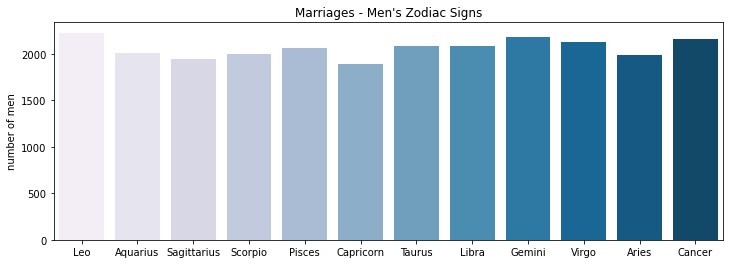

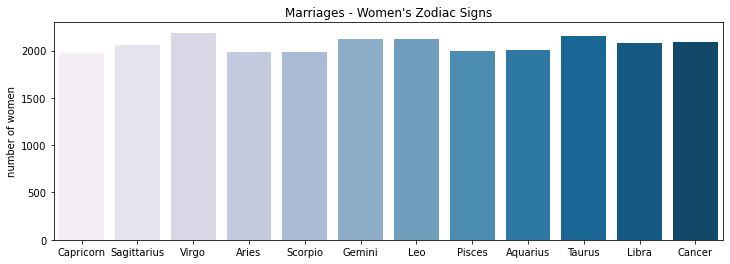

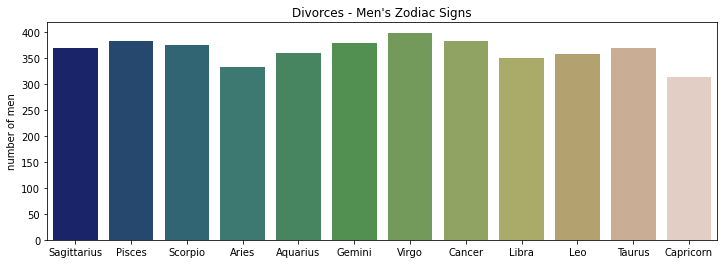

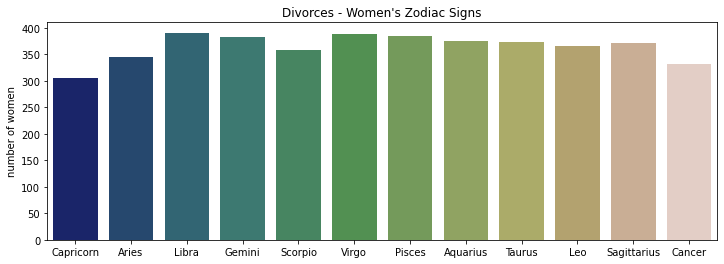

In [82]:
plt.figure(figsize=(12,4))
plot = sns.countplot(x="M_Sign", data=marriage_df, palette="PuBu").set_title("Marriages - Men's Zodiac Signs")
plt.xlabel("")
plt.ylabel("number of men")

plt.figure(figsize=(12,4))
plot = sns.countplot(x="F_Sign", data=marriage_df, palette="PuBu").set_title("Marriages - Women's Zodiac Signs")
plt.xlabel("")
plt.ylabel("number of women")

plt.figure(figsize=(12,4))
plot = sns.countplot(x="M_Sign", data=divorce_df, palette="gist_earth").set_title("Divorces - Men's Zodiac Signs")
plt.xlabel("")
plt.ylabel("number of men")

plt.figure(figsize=(12,4))
plot = sns.countplot(x="F_Sign", data=divorce_df, palette="gist_earth").set_title("Divorces - Women's Zodiac Signs")
plt.xlabel("")
plt.ylabel("number of women")

We notice that mostly, the signs are relatively equally distributed in representation, and that we do have data points for each of the signs. There appears to be some slight variation in number of married people or divorcees of certain signs, but my focus for this project is pairings between signs and not the individual people themselves, so this could be the subject of a future investigation.

## The Analysis

### Part 1: Conditional Probabilities

We can start our analysis of this data out by examining some conditional probabilities using the two datasets of marriages and divorces. Let $A$ be a variable that represents the sign of a man and $B$ be a variable that represents the sign of a woman. Let $M$ be the event that two people are married and $D$ be the event that two people get divorced. For every pair of signs $(i, j)$ it might be interesting to calculate 

$$P(A=i, B=j | M) = \frac{P(A=i, B=j, M)}{P(M)} = \frac{\text{# of married couples with A=i and B=j}}{\text{# of married couples}}$$
in other words the probability given two people got married that the man is sign i and the woman is sign j, and

$$P(A=i, B=j | D) = \frac{P(A=i, B=j, D)}{P(D)} = \frac{\text{# of divorced couples with A=i and B=j}}{\text{# of divorced couples}}$$
in other words the probability given two people got divorced that the man is sign i and the woman is sign j. 

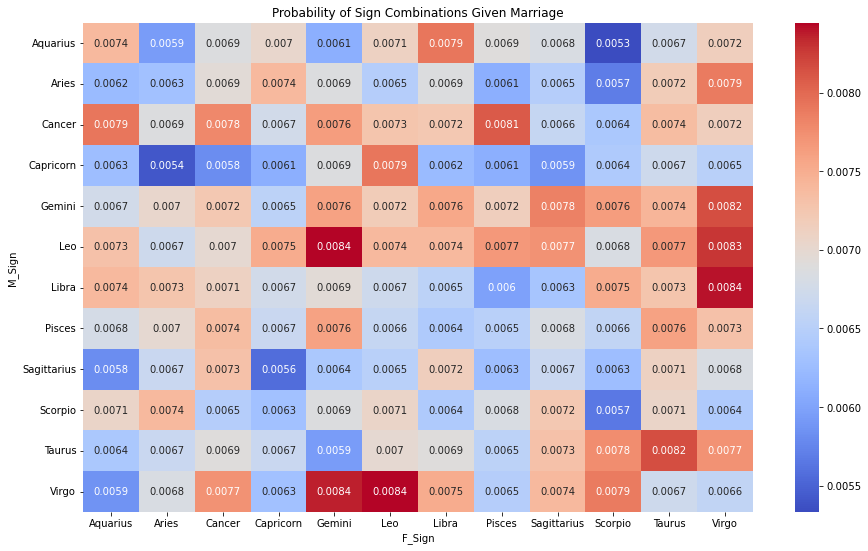

In [83]:
marriage_pairs = pd.crosstab(marriage_df['M_Sign'], marriage_df['F_Sign'])
marriage_pairs = marriage_pairs.div(total_marriage_datapoints)

# Plot as a heatmap
plt.figure(figsize=(15,9))
sns.heatmap(marriage_pairs, annot=True, cmap='coolwarm', )
plt.title('Probability of Sign Combinations Given Marriage')
plt.show()

Starting out with $P(A=i, B=j | M)$, it looks like given two people are married, the most likely pairs are the following. I also included the values from the compatibility chart from zodiac12signs.com for comparison to the data:

| Woman | Man | Probability | zodiac12signs.com "Compatibility" |
|-------|-----|-------------|---------|
|Gemini |Leo  |0.0084|82%|
|Gemini |Virgo|0.0084|78%|
|Leo    |Virgo|0.0084|86%|
|Virgo  |Libra|0.0084|73%|

While the least likely pairs are the following:

| Woman | Man | Probability |zodiac12signs.com "Compatibility" |
|-------|-----|-------------|------|
|Scorpio |Aquarius  |0.0053|88%|
|Aries |Capricorn|0.0054|55%|
|Capricorn |Sagittarius|0.0056|76%|
|Scorpio  |Aries|0.0057|50%|
|Scorpio  |Scorpio|0.0057|79%|

While zodiac12signs.com has given fairly high values for compatibility for all of our most likely pairs of signs given two people are married, it also gave several high values for some of the least likely pairs of signs given two people are married. This is likely due to the fact that the values in zodiac12signs.com's compatibility chart are skewed fairly high, with most values being over 50%. I'm still not sure what the percentages in this compatibility chart are meant to represent (the percentage of people who become couples? the percentage of times couples fight?), but so far they don't seem to be very good predictors...

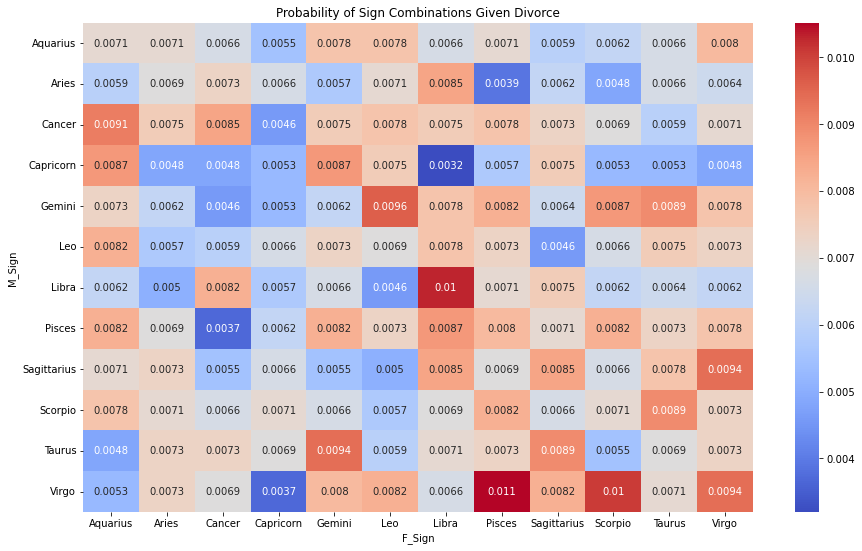

In [52]:
divorce_pairs = pd.crosstab(divorce_df['M_Sign'], divorce_df['F_Sign'])
divorce_pairs = divorce_pairs.div(total_divorce_datapoints)

# Plot as a heatmap
plt.figure(figsize=(15,9))
sns.heatmap(divorce_pairs, annot=True, cmap='coolwarm', )
plt.title('Probability of Sign Combinations Given Divorce')
plt.show()

Let's examine $P(A=i, B=j | D)$ now. It looks like given two people are divorced, the most likely pairs are the following:

| Woman | Man | Probability | zodiac12signs.com "Compatibility" |
|-------|-----|-------------|---------|
|Pisces |Virgo |0.011|50%|
|Libra |Libra|0.01|74%|
|Scorpio    |Virgo|0.01|85%|
|Leo  |Gemini|0.0096|86%|

While the least likely pairs are the following:

| Woman | Man | Probability |zodiac12signs.com "Compatibility" |
|-------|-----|-------------|------|
|Libra |Capricorn  |0.0032|66%|
|Capricorn |Virgo|0.0037|98%|
|Cancer |Pisces|0.0037|91%|
|Pisces  |Aries|0.0039|95%|

This is a pretty different group of signs than for the probabilities given two people are married. As for zodiac12signs.com, it again doesn't seem too trustworthy since it gave us some pretty high compatibility scores for several of the pairings that were most likely given divorce. But it did also give some pretty high compatibility scores for several of the pairings that were least likely given divorce, so perhaps there's hope for astrology after all.

Since we might want to maximize the probability of a sign combination given people get married and minimize the probability of a sign combination given people get divorced, I've also visualized the difference between the two heatmaps above:

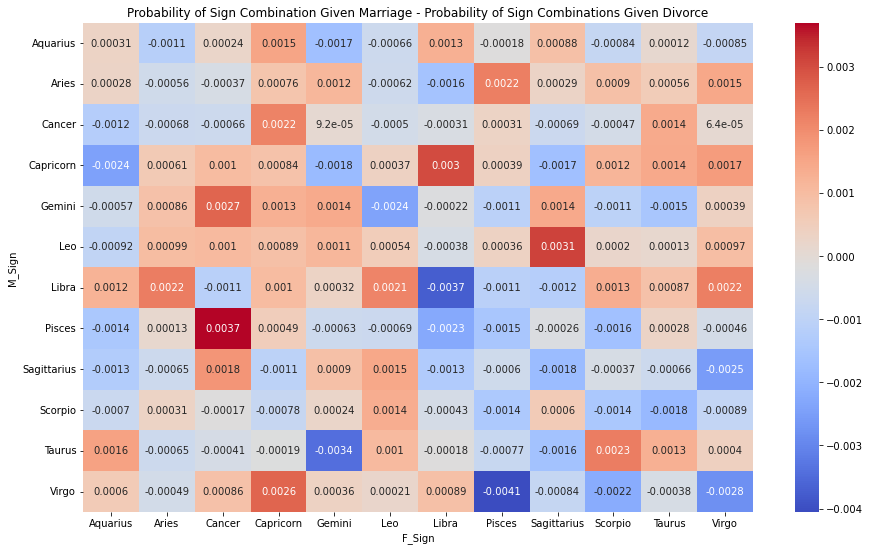

In [61]:
diff_matrix = marriage_pairs - divorce_pairs
# Plot as a heatmap
plt.figure(figsize=(15,9))
sns.heatmap(diff_matrix, annot=True, cmap='coolwarm')
plt.title("Probability of Sign Combination Given Marriage - Probability of Sign Combinations Given Divorce")
plt.show()

Now our "most compatible" pairs are the following:

| Woman | Man | zodiac12signs.com "Compatibility" |
|-------|-----|---------|
|Cancer |Pisces|91%|
|Sagittarius |Leo|90%|
|Libra |Capricorn |66%|

And our "least compatible" pairs are the following:

| Woman | Man | zodiac12signs.com "Compatibility" |
|-------|-----|---------|
|Pisces |Virgo |50%|
|Libra |Libra|74%|
|Gemini    |Taurus|83%|

Before leaving the subject of conditional probabilities, I'd like to use conditional probabilities to check just one more thing. If I am a man with sign i, which sign am I most likely to get married to (assuming I want a heterosexual relationship)? That is, given my sign, my gender, and the fact that I am married, what is the probability that my partner has a certain sign? In other words, I am looking to calculate

$$P(B=j| A=i, M) = \frac{P(A=i, B=j, M)}{P(A=i, M)} = \frac{\text{# of married couples with A=i and B=j}}{\text{# of married couples where A=i}}$$
and its equivalents for women and the event of divorce
$$P(A=i| B=j, M) = \frac{P(A=i, B=j, M)}{P(B=j, M)} = \frac{\text{# of married couples with A=i and B=j}}{\text{# of married couples where B=j}}$$
$$P(B=j| A=i, D) = \frac{P(A=i, B=j, D)}{P(A=i, D)} = \frac{\text{# of divorced couples with A=i and B=j}}{\text{# of divorced couples where A=i}}$$
$$P(A=i| B=j, D) = \frac{P(A=i, B=j, D)}{P(B=j, D)} = \frac{\text{# of divorced couples with A=i and B=j}}{\text{# of divorced couples where B=j}}$$

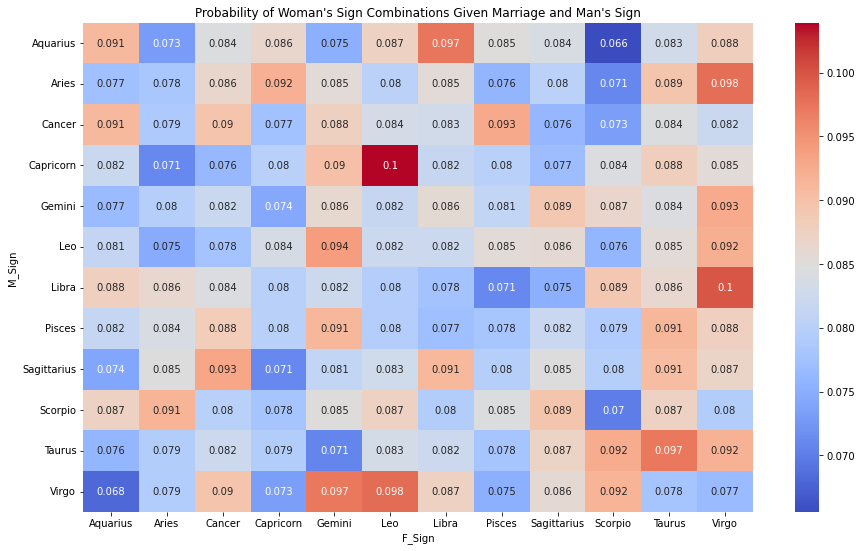

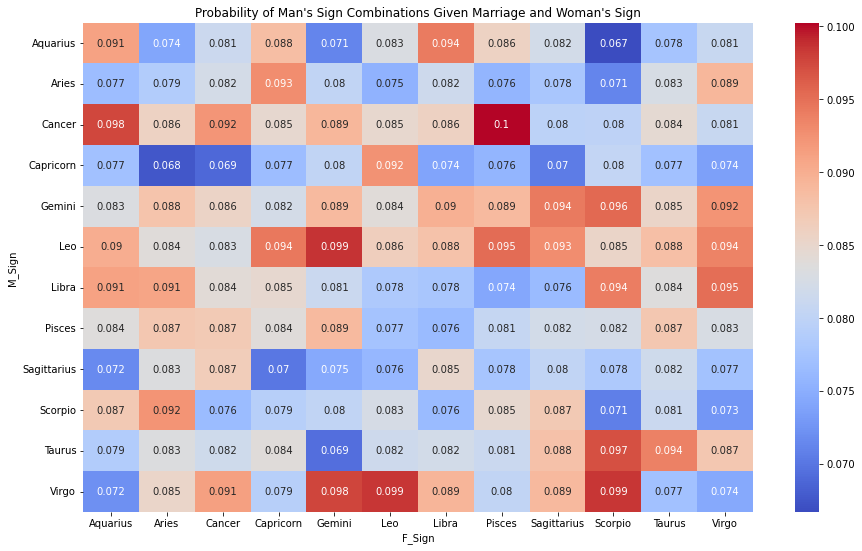

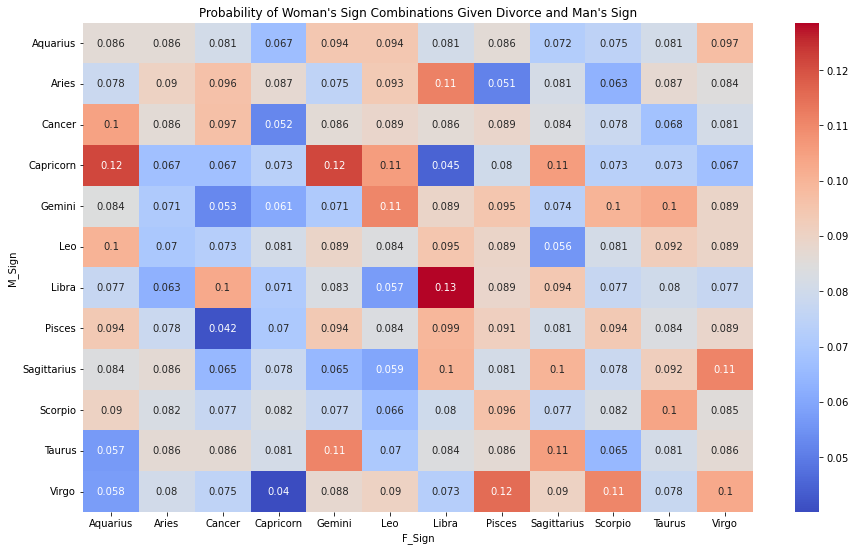

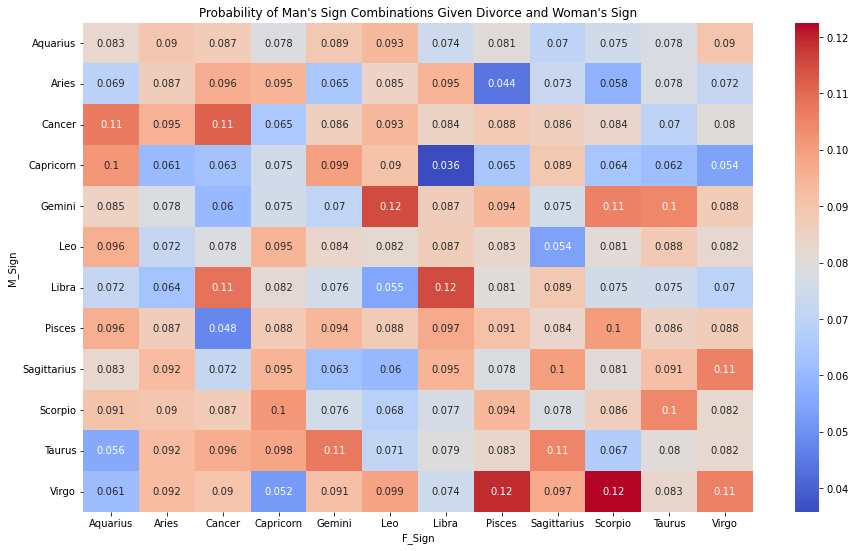

In [57]:
marriage_men = pd.crosstab(marriage_df['M_Sign'], marriage_df['F_Sign'])
marriage_men = marriage_men.div(marriage_men.sum(axis=1), axis=0)
# Plot as a heatmap
plt.figure(figsize=(15,9))
sns.heatmap(marriage_men, annot=True, cmap='coolwarm', )
plt.title("Probability of Woman's Sign Combinations Given Marriage and Man's Sign")
plt.show()

marriage_women = pd.crosstab(marriage_df['M_Sign'], marriage_df['F_Sign'])
marriage_women = marriage_women.div(marriage_women.sum(axis=0), axis=1)
# Plot as a heatmap
plt.figure(figsize=(15,9))
sns.heatmap(marriage_women, annot=True, cmap='coolwarm', )
plt.title("Probability of Man's Sign Combinations Given Marriage and Woman's Sign")
plt.show()

divorce_men = pd.crosstab(divorce_df['M_Sign'], divorce_df['F_Sign'])
divorce_men = divorce_men.div(divorce_men.sum(axis=1), axis=0)
# Plot as a heatmap
plt.figure(figsize=(15,9))
sns.heatmap(divorce_men, annot=True, cmap='coolwarm', )
plt.title("Probability of Woman's Sign Combinations Given Divorce and Man's Sign")
plt.show()

divorce_women = pd.crosstab(divorce_df['M_Sign'], divorce_df['F_Sign'])
divorce_women = divorce_women.div(divorce_women.sum(axis=0), axis=1)
# Plot as a heatmap
plt.figure(figsize=(15,9))
sns.heatmap(divorce_women, annot=True, cmap='coolwarm', )
plt.title("Probability of Man's Sign Combinations Given Divorce and Woman's Sign")
plt.show()

Perhaps the heatmaps above could be of interest to people thinking about entering a relationship...

### Part 2: Bootstrapping p-values

As a CS 109 computer scientist, though, I know that I have more tools under my belt than just conditional probability to examine this data with!

Because my data comes from a sample of the population, I might wonder: how much of the variation in my data just comes from random sampling and how much is actually due to a relationship between zodiac signs and marriage/divorce? 

To answer this question I've come up with the following procedure. 

First, I will calculate the overall probability that a married couple gets divorce by taking 
$$p=\frac{|D|}{|M|}$$
where $|M|$ is the number of married couples in marriage_df and $|D|$ is the number of married couples in marriage_df that are also in divorce_df.

For each pair of zodiac signs $(i,j)$, let $M_{i,j}$ be the number of couples with signs (i, j) that got married (that are in marriage_df) and let $D_{i,j}$ be the number of couples with signs $(i, j)$ that got married and then divorced (that are in both marriage_df and divorce_df). I will calculate the probability that a married couple of signs $(i, j)$ gets divorced by taking 
$$\hat{p}_{i,j}=\frac{D_{i,j}}{M_{i,j}}$$

Then I will repeatedly take samples of size $M_{i,j}$ from the entire marriage_df. For each sample I will calculate the probability that married couples get divorced, $\bar{p}$. I will calculate the proportion of these samples for which $|\bar{p} - p| >= |\hat{p}_{i,j} - p|$. If this proportion is greater than 0.05, I have found that the probability that a couple with signs $(i,j)$ got married and then divorced was statistically significant.

There are a couple of limitations to this approach. Firstly, my dataset only goes from the year 2000-2015 for both marriages and divorces, so a couple could have gotten married and then divorced after 2015 and their divorce would not be counted by my analysis. Secondly, my dataset only comes from the registry in Xalapa, Mexico, so a couple could have gotten married in Xalapa and then divorced elsewhere and would not be counted in my analysis. Finally, in order to determine which couples were in both marriage_df and divorce_df, I matched the dates of birth and the dates of marriage in both datasets to each other, but this has no guarantees that the two people with birth dates and a marriage date in one dataset are equivalent to the two people with birth dates and a marriage date in the other. Because of this matching strategy, I also had to drop a few cases in which there were multiple marriages with the same birth dates and marriage dates, to avoid overcounting multiple marriages for a single divorce.

In [95]:
# Checks if a row in marriage_df is also in divorce_df
def in_divorce_df(divorce_df, couple):
    if ((divorce_df['M_DOB'] == couple['M_DOB']) & (divorce_df['F_DOB'] == couple['F_DOB']) & (divorce_df['Marriage_Date'] == couple['Marriage_Date'])).any():
        return 'Yes'
    return 'No'

In [90]:
marriage_df['M_DOB'] = marriage_df['M_DOB'].astype(str)
marriage_df['F_DOB'] = marriage_df['F_DOB'].astype(str)
marriage_df['Marriage_Date'] = marriage_df['Marriage_Date'].astype(str)
# Get rid of duplicate rows where couples had identical dates of birth and dates of marriage
marriage_df = marriage_df.drop_duplicates(subset=['M_DOB', 'F_DOB', 'Marriage_Date'])

divorce_df['M_DOB'] = divorce_df['M_DOB'].astype(str)
divorce_df['F_DOB'] = divorce_df['F_DOB'].astype(str)
divorce_df['Marriage_Date'] = divorce_df['Marriage_Date'].astype(str)

# Create a new column that checks whether a row in marriage_df is also in divorce_df
marriage_df['Divorced'] = marriage_df.apply(lambda x: in_divorce_df(divorce_df, x), axis=1)

New number of marriage datapoints:  24718


,Marriage_Date,M_DOB,F_DOB,M_Sign,F_Sign,Divorced
0,2000-01-03,1974-08-20,1980-01-01,Leo,Capricorn,No
1,2000-01-05,1980-02-12,1981-12-12,Aquarius,Sagittarius,No
2,2000-01-05,1978-11-26,1979-09-04,Sagittarius,Virgo,No
3,2000-01-06,1974-10-30,1978-12-04,Scorpio,Sagittarius,Yes
4,2000-01-06,1937-03-13,1956-09-11,Pisces,Virgo,No
5,2000-01-07,1974-12-24,1977-01-07,Capricorn,Capricorn,Yes
6,2000-01-07,1976-05-17,1967-04-01,Taurus,Aries,No
7,2000-01-07,1981-09-26,1977-12-27,Libra,Capricorn,No
8,2000-01-07,1974-12-10,1979-11-09,Sagittarius,Scorpio,No
9,2000-01-08,1972-12-29,1972-05-27,Capricorn,Gemini,No


In [126]:
# Save this modified df to a csv
marriage_df.to_csv("../results/marriage_df.csv")

In [100]:
total_marriage_datapoints = len(marriage_df)
print("New number of marriage datapoints: ", total_marriage_datapoints)
total_num_divorced = len(marriage_df[marriage_df['Divorced']=='Yes'])
print("Number of marriages that ended in divorce: ", total_num_divorced)
p = total_num_divorced / total_marriage_datapoints
print("p = |D|/|M| = ", p)
marriage_df.head(10)

New number of marriage datapoints:  24718
Number of marriages that ended in divorce:  1282
p = |D|/|M| =  0.05186503762440327


,Marriage_Date,M_DOB,F_DOB,M_Sign,F_Sign,Divorced
0,2000-01-03,1974-08-20,1980-01-01,Leo,Capricorn,No
1,2000-01-05,1980-02-12,1981-12-12,Aquarius,Sagittarius,No
2,2000-01-05,1978-11-26,1979-09-04,Sagittarius,Virgo,No
3,2000-01-06,1974-10-30,1978-12-04,Scorpio,Sagittarius,Yes
4,2000-01-06,1937-03-13,1956-09-11,Pisces,Virgo,No
5,2000-01-07,1974-12-24,1977-01-07,Capricorn,Capricorn,Yes
6,2000-01-07,1976-05-17,1967-04-01,Taurus,Aries,No
7,2000-01-07,1981-09-26,1977-12-27,Libra,Capricorn,No
8,2000-01-07,1974-12-10,1979-11-09,Sagittarius,Scorpio,No
9,2000-01-08,1972-12-29,1972-05-27,Capricorn,Gemini,No


The above implies that on average, with no regard to zodiac sign, 5.1865% of marriages ended in divorce based on my dataset.

In [109]:
signs = list(marriage_df["M_Sign"].unique())
NUM_SAMPLES = 10000

In [119]:
def do_bootstrap(i, j, marriage_df, NUM_SAMPLES, p):
    # Perform bootstrapping for the p-value for the proportion of couples that get married and then divorced
    M_i_j = len(marriage_df[(marriage_df['M_Sign'] == signs[i]) & (marriage_df['F_Sign'] == signs[j])])
    D_i_j = len(marriage_df[(marriage_df['M_Sign'] == signs[i]) & (marriage_df['F_Sign'] == signs[j]) & (marriage_df['Divorced'] == 'Yes')])
    phat = D_i_j / M_i_j
    observed_diff = abs(p - phat)

    count = 0
    for k in tqdm(range(NUM_SAMPLES)):
        curr_sample = marriage_df.sample(M_i_j)
        M_sample = len(curr_sample)
        D_sample = len(curr_sample[curr_sample['Divorced'] == 'Yes'])
        pbar = D_sample / M_sample
        diff = abs(p - pbar)
        if diff >= observed_diff:
            count += 1

    pvalue = count / NUM_SAMPLES
    return phat, pvalue

In [120]:
bootstrapping_results = []
for i in range(len(signs)):
    for j in range(len(signs)):
        # For every combination of signs (i, j)
        phat, pvalue = do_bootstrap(i, j, marriage_df, NUM_SAMPLES, p)
        if pvalue < 0.05:
            # Reject null hypothesis
            print(f'There IS a statistically significant difference for A={signs[i]} and B={signs[j]}, p_hat = {phat} with p-value {pvalue}')
        else:
            # Accept null hypothesis
            print(f'NO statistically significant difference for A={signs[i]} and B={signs[j]}, p_hat = {phat} with p-value {pvalue}')
        bootstrapping_results.append([signs[i], signs[j], phat, pvalue])

100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 769.98it/s]


NO statistically significant difference for A=Leo and B=Leo, p_hat = 0.0546448087431694 with p-value 0.8674


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 806.79it/s]


NO statistically significant difference for A=Leo and B=Aquarius, p_hat = 0.04419889502762431 with p-value 0.7451


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 792.33it/s]


NO statistically significant difference for A=Leo and B=Sagittarius, p_hat = 0.041884816753926704 with p-value 0.6335


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 789.21it/s]


NO statistically significant difference for A=Leo and B=Scorpio, p_hat = 0.0650887573964497 with p-value 0.4868


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 794.31it/s]


NO statistically significant difference for A=Leo and B=Pisces, p_hat = 0.07894736842105263 with p-value 0.1013


100%|███████████████████████████████████| 10000/10000 [00:13<00:00, 750.67it/s]


NO statistically significant difference for A=Leo and B=Capricorn, p_hat = 0.06521739130434782 with p-value 0.512


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 775.32it/s]


NO statistically significant difference for A=Leo and B=Taurus, p_hat = 0.07894736842105263 with p-value 0.0985


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 785.62it/s]


NO statistically significant difference for A=Leo and B=Libra, p_hat = 0.0546448087431694 with p-value 0.863


100%|███████████████████████████████████| 10000/10000 [00:19<00:00, 505.10it/s]


NO statistically significant difference for A=Leo and B=Gemini, p_hat = 0.03349282296650718 with p-value 0.2804


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 795.81it/s]


NO statistically significant difference for A=Leo and B=Virgo, p_hat = 0.03414634146341464 with p-value 0.2702


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 812.40it/s]


NO statistically significant difference for A=Leo and B=Aries, p_hat = 0.060240963855421686 with p-value 0.7257


100%|███████████████████████████████████| 10000/10000 [00:13<00:00, 753.66it/s]


NO statistically significant difference for A=Leo and B=Cancer, p_hat = 0.04046242774566474 with p-value 0.6012


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 789.68it/s]


NO statistically significant difference for A=Aquarius and B=Leo, p_hat = 0.0625 with p-value 0.6031


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 803.01it/s]


NO statistically significant difference for A=Aquarius and B=Aquarius, p_hat = 0.06557377049180328 with p-value 0.392


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 807.35it/s]


NO statistically significant difference for A=Aquarius and B=Sagittarius, p_hat = 0.023668639053254437 with p-value 0.1173


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 791.56it/s]


NO statistically significant difference for A=Aquarius and B=Scorpio, p_hat = 0.07575757575757576 with p-value 0.2296


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 779.47it/s]


NO statistically significant difference for A=Aquarius and B=Pisces, p_hat = 0.03508771929824561 with p-value 0.3856


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 796.34it/s]


NO statistically significant difference for A=Aquarius and B=Capricorn, p_hat = 0.05747126436781609 with p-value 0.8621


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 797.49it/s]


NO statistically significant difference for A=Aquarius and B=Taurus, p_hat = 0.048484848484848485 with p-value 0.8676


100%|███████████████████████████████████| 10000/10000 [00:13<00:00, 757.40it/s]


NO statistically significant difference for A=Aquarius and B=Libra, p_hat = 0.025510204081632654 with p-value 0.1013


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 810.86it/s]


NO statistically significant difference for A=Aquarius and B=Gemini, p_hat = 0.07947019867549669 with p-value 0.1386


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 813.26it/s]


NO statistically significant difference for A=Aquarius and B=Virgo, p_hat = 0.03389830508474576 with p-value 0.3088


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 785.52it/s]


NO statistically significant difference for A=Aquarius and B=Aries, p_hat = 0.0547945205479452 with p-value 1.0


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 802.40it/s]


NO statistically significant difference for A=Aquarius and B=Cancer, p_hat = 0.07647058823529412 with p-value 0.1612


100%|███████████████████████████████████| 10000/10000 [00:14<00:00, 695.67it/s]


NO statistically significant difference for A=Sagittarius and B=Leo, p_hat = 0.055900621118012424 with p-value 0.862


100%|███████████████████████████████████| 10000/10000 [00:13<00:00, 717.86it/s]


NO statistically significant difference for A=Sagittarius and B=Aquarius, p_hat = 0.04861111111111111 with p-value 1.0


100%|███████████████████████████████████| 10000/10000 [00:13<00:00, 739.04it/s]


NO statistically significant difference for A=Sagittarius and B=Sagittarius, p_hat = 0.06060606060606061 with p-value 0.727


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 792.17it/s]


NO statistically significant difference for A=Sagittarius and B=Scorpio, p_hat = 0.06451612903225806 with p-value 0.6002


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 825.48it/s]


NO statistically significant difference for A=Sagittarius and B=Pisces, p_hat = 0.05161290322580645 with p-value 1.0


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 853.09it/s]


NO statistically significant difference for A=Sagittarius and B=Capricorn, p_hat = 0.057971014492753624 with p-value 0.8549


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 837.16it/s]


NO statistically significant difference for A=Sagittarius and B=Taurus, p_hat = 0.03977272727272727 with p-value 0.5071


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 827.84it/s]


NO statistically significant difference for A=Sagittarius and B=Libra, p_hat = 0.0625 with p-value 0.6111


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 845.66it/s]


NO statistically significant difference for A=Sagittarius and B=Gemini, p_hat = 0.0379746835443038 with p-value 0.4797


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 866.65it/s]


NO statistically significant difference for A=Sagittarius and B=Virgo, p_hat = 0.0650887573964497 with p-value 0.4886


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 832.24it/s]


NO statistically significant difference for A=Sagittarius and B=Aries, p_hat = 0.06666666666666667 with p-value 0.4897


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 824.43it/s]


NO statistically significant difference for A=Sagittarius and B=Cancer, p_hat = 0.044444444444444446 with p-value 0.7343


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 821.67it/s]


NO statistically significant difference for A=Scorpio and B=Leo, p_hat = 0.06857142857142857 with p-value 0.3943


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 844.18it/s]


NO statistically significant difference for A=Scorpio and B=Aquarius, p_hat = 0.045714285714285714 with p-value 0.7456


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 826.88it/s]


NO statistically significant difference for A=Scorpio and B=Sagittarius, p_hat = 0.0335195530726257 with p-value 0.314


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 837.54it/s]


NO statistically significant difference for A=Scorpio and B=Scorpio, p_hat = 0.07857142857142857 with p-value 0.1734


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 873.85it/s]


NO statistically significant difference for A=Scorpio and B=Pisces, p_hat = 0.07738095238095238 with p-value 0.162


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 858.86it/s]


NO statistically significant difference for A=Scorpio and B=Capricorn, p_hat = 0.05128205128205128 with p-value 1.0


100%|███████████████████████████████████| 10000/10000 [00:13<00:00, 761.24it/s]


NO statistically significant difference for A=Scorpio and B=Taurus, p_hat = 0.08 with p-value 0.1233


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 859.76it/s]


NO statistically significant difference for A=Scorpio and B=Libra, p_hat = 0.050314465408805034 with p-value 1.0


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 826.47it/s]


NO statistically significant difference for A=Scorpio and B=Gemini, p_hat = 0.047058823529411764 with p-value 0.8648


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 818.57it/s]


NO statistically significant difference for A=Scorpio and B=Virgo, p_hat = 0.03773584905660377 with p-value 0.4734


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 771.48it/s]


NO statistically significant difference for A=Scorpio and B=Aries, p_hat = 0.04419889502762431 with p-value 0.7348


100%|███████████████████████████████████| 10000/10000 [00:13<00:00, 735.51it/s]


NO statistically significant difference for A=Scorpio and B=Cancer, p_hat = 0.0625 with p-value 0.5899


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 785.82it/s]


NO statistically significant difference for A=Pisces and B=Leo, p_hat = 0.07317073170731707 with p-value 0.2813


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 840.26it/s]


NO statistically significant difference for A=Pisces and B=Aquarius, p_hat = 0.08383233532934131 with p-value 0.0757


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 829.95it/s]


NO statistically significant difference for A=Pisces and B=Sagittarius, p_hat = 0.03571428571428571 with p-value 0.397


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 825.50it/s]


NO statistically significant difference for A=Pisces and B=Scorpio, p_hat = 0.06748466257668712 with p-value 0.3723


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 859.53it/s]


NO statistically significant difference for A=Pisces and B=Pisces, p_hat = 0.062111801242236024 with p-value 0.5872


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 819.78it/s]


NO statistically significant difference for A=Pisces and B=Capricorn, p_hat = 0.042682926829268296 with p-value 0.6102


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 808.95it/s]


NO statistically significant difference for A=Pisces and B=Taurus, p_hat = 0.03723404255319149 with p-value 0.4049


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 834.25it/s]


NO statistically significant difference for A=Pisces and B=Libra, p_hat = 0.04430379746835443 with p-value 0.7272


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 797.07it/s]


NO statistically significant difference for A=Pisces and B=Gemini, p_hat = 0.05319148936170213 with p-value 1.0


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 855.69it/s]


NO statistically significant difference for A=Pisces and B=Virgo, p_hat = 0.055248618784530384 with p-value 0.864


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 827.38it/s]


NO statistically significant difference for A=Pisces and B=Aries, p_hat = 0.046242774566473986 with p-value 0.8715


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 835.74it/s]


NO statistically significant difference for A=Pisces and B=Cancer, p_hat = 0.03296703296703297 with p-value 0.3107


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 840.68it/s]


NO statistically significant difference for A=Capricorn and B=Leo, p_hat = 0.04591836734693878 with p-value 0.761


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 840.20it/s]


NO statistically significant difference for A=Capricorn and B=Aquarius, p_hat = 0.07741935483870968 with p-value 0.1967


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 842.88it/s]


NO statistically significant difference for A=Capricorn and B=Sagittarius, p_hat = 0.08275862068965517 with p-value 0.1205


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 848.21it/s]


NO statistically significant difference for A=Capricorn and B=Scorpio, p_hat = 0.03164556962025317 with p-value 0.282


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 809.41it/s]


NO statistically significant difference for A=Capricorn and B=Pisces, p_hat = 0.026490066225165563 with p-value 0.1993


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 830.62it/s]


NO statistically significant difference for A=Capricorn and B=Capricorn, p_hat = 0.046357615894039736 with p-value 0.8598


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 817.56it/s]


NO statistically significant difference for A=Capricorn and B=Taurus, p_hat = 0.03614457831325301 with p-value 0.3915


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 865.23it/s]


NO statistically significant difference for A=Capricorn and B=Libra, p_hat = 0.03896103896103896 with p-value 0.5992


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 839.83it/s]


NO statistically significant difference for A=Capricorn and B=Gemini, p_hat = 0.08235294117647059 with p-value 0.087


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 864.53it/s]


NO statistically significant difference for A=Capricorn and B=Virgo, p_hat = 0.024844720496894408 with p-value 0.1546


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 885.08it/s]


NO statistically significant difference for A=Capricorn and B=Aries, p_hat = 0.05223880597014925 with p-value 1.0


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 849.34it/s]


NO statistically significant difference for A=Capricorn and B=Cancer, p_hat = 0.03496503496503497 with p-value 0.4512


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 873.17it/s]


NO statistically significant difference for A=Taurus and B=Leo, p_hat = 0.05202312138728324 with p-value 1.0


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 828.86it/s]


NO statistically significant difference for A=Taurus and B=Aquarius, p_hat = 0.0379746835443038 with p-value 0.4774


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 808.07it/s]


NO statistically significant difference for A=Taurus and B=Sagittarius, p_hat = 0.07734806629834254 with p-value 0.1203


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 813.09it/s]


There IS a statistically significant difference for A=Taurus and B=Scorpio, p_hat = 0.010416666666666666 with p-value 0.0138


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 835.73it/s]


NO statistically significant difference for A=Taurus and B=Pisces, p_hat = 0.06172839506172839 with p-value 0.589


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 844.85it/s]


NO statistically significant difference for A=Taurus and B=Capricorn, p_hat = 0.04242424242424243 with p-value 0.6168


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 857.81it/s]


NO statistically significant difference for A=Taurus and B=Taurus, p_hat = 0.06965174129353234 with p-value 0.253


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 835.96it/s]


NO statistically significant difference for A=Taurus and B=Libra, p_hat = 0.05847953216374269 with p-value 0.7285


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 868.80it/s]


NO statistically significant difference for A=Taurus and B=Gemini, p_hat = 0.04794520547945205 with p-value 0.8603


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 851.75it/s]


NO statistically significant difference for A=Taurus and B=Virgo, p_hat = 0.06842105263157895 with p-value 0.3277


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 873.86it/s]


NO statistically significant difference for A=Taurus and B=Aries, p_hat = 0.04242424242424243 with p-value 0.6128


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 872.52it/s]


NO statistically significant difference for A=Taurus and B=Cancer, p_hat = 0.07017543859649122 with p-value 0.2994


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 813.32it/s]


NO statistically significant difference for A=Libra and B=Leo, p_hat = 0.03614457831325301 with p-value 0.3902


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 825.18it/s]


NO statistically significant difference for A=Libra and B=Aquarius, p_hat = 0.054945054945054944 with p-value 0.8626


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 838.63it/s]


NO statistically significant difference for A=Libra and B=Sagittarius, p_hat = 0.07643312101910828 with p-value 0.2051


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 846.31it/s]


NO statistically significant difference for A=Libra and B=Scorpio, p_hat = 0.05945945945945946 with p-value 0.7445


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 818.81it/s]


NO statistically significant difference for A=Libra and B=Pisces, p_hat = 0.02027027027027027 with p-value 0.0937


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 825.83it/s]


NO statistically significant difference for A=Libra and B=Capricorn, p_hat = 0.041916167664670656 with p-value 0.6026


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 855.98it/s]


NO statistically significant difference for A=Libra and B=Taurus, p_hat = 0.03333333333333333 with p-value 0.3137


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 844.98it/s]


NO statistically significant difference for A=Libra and B=Libra, p_hat = 0.06172839506172839 with p-value 0.5902


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 828.33it/s]


NO statistically significant difference for A=Libra and B=Gemini, p_hat = 0.040697674418604654 with p-value 0.6054


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 816.39it/s]


NO statistically significant difference for A=Libra and B=Virgo, p_hat = 0.04326923076923077 with p-value 0.6343


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 823.61it/s]


NO statistically significant difference for A=Libra and B=Aries, p_hat = 0.022222222222222223 with p-value 0.088


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 826.48it/s]


NO statistically significant difference for A=Libra and B=Cancer, p_hat = 0.05714285714285714 with p-value 0.8654


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 814.16it/s]


NO statistically significant difference for A=Gemini and B=Leo, p_hat = 0.06779661016949153 with p-value 0.3915


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 832.18it/s]


NO statistically significant difference for A=Gemini and B=Aquarius, p_hat = 0.08383233532934131 with p-value 0.08


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 812.17it/s]


NO statistically significant difference for A=Gemini and B=Sagittarius, p_hat = 0.030927835051546393 with p-value 0.1981


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 868.17it/s]


There IS a statistically significant difference for A=Gemini and B=Scorpio, p_hat = 0.08465608465608465 with p-value 0.0488


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 862.94it/s]


NO statistically significant difference for A=Gemini and B=Pisces, p_hat = 0.05649717514124294 with p-value 0.8608


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 864.62it/s]


NO statistically significant difference for A=Gemini and B=Capricorn, p_hat = 0.04938271604938271 with p-value 1.0


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 828.97it/s]


NO statistically significant difference for A=Gemini and B=Taurus, p_hat = 0.07065217391304347 with p-value 0.3159


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 864.46it/s]


NO statistically significant difference for A=Gemini and B=Libra, p_hat = 0.0374331550802139 with p-value 0.4053


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 826.26it/s]


NO statistically significant difference for A=Gemini and B=Gemini, p_hat = 0.03723404255319149 with p-value 0.4008


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 828.68it/s]


NO statistically significant difference for A=Gemini and B=Virgo, p_hat = 0.024752475247524754 with p-value 0.1042


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 820.33it/s]


NO statistically significant difference for A=Gemini and B=Aries, p_hat = 0.034482758620689655 with p-value 0.3096


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 861.42it/s]


NO statistically significant difference for A=Gemini and B=Cancer, p_hat = 0.0223463687150838 with p-value 0.0861


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 831.50it/s]


There IS a statistically significant difference for A=Virgo and B=Leo, p_hat = 0.0861244019138756 with p-value 0.0303


100%|███████████████████████████████████| 10000/10000 [00:16<00:00, 622.02it/s]


NO statistically significant difference for A=Virgo and B=Aquarius, p_hat = 0.034482758620689655 with p-value 0.3603


100%|███████████████████████████████████| 10000/10000 [00:13<00:00, 754.67it/s]


NO statistically significant difference for A=Virgo and B=Sagittarius, p_hat = 0.04371584699453552 with p-value 0.7424


100%|███████████████████████████████████| 10000/10000 [00:13<00:00, 742.72it/s]


NO statistically significant difference for A=Virgo and B=Scorpio, p_hat = 0.07692307692307693 with p-value 0.141


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 837.86it/s]


NO statistically significant difference for A=Virgo and B=Pisces, p_hat = 0.0625 with p-value 0.5935


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 825.34it/s]


NO statistically significant difference for A=Virgo and B=Capricorn, p_hat = 0.04487179487179487 with p-value 0.7228


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 813.43it/s]


NO statistically significant difference for A=Virgo and B=Taurus, p_hat = 0.060240963855421686 with p-value 0.7297


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 808.42it/s]


NO statistically significant difference for A=Virgo and B=Libra, p_hat = 0.08064516129032258 with p-value 0.0915


100%|███████████████████████████████████| 10000/10000 [00:13<00:00, 756.10it/s]


NO statistically significant difference for A=Virgo and B=Gemini, p_hat = 0.04854368932038835 with p-value 0.8769


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 826.60it/s]


NO statistically significant difference for A=Virgo and B=Virgo, p_hat = 0.05521472392638037 with p-value 0.8581


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 829.59it/s]


NO statistically significant difference for A=Virgo and B=Aries, p_hat = 0.04142011834319527 with p-value 0.6009


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 774.00it/s]


NO statistically significant difference for A=Virgo and B=Cancer, p_hat = 0.05759162303664921 with p-value 0.7381


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 825.06it/s]


NO statistically significant difference for A=Aries and B=Leo, p_hat = 0.05 with p-value 1.0


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 841.70it/s]


NO statistically significant difference for A=Aries and B=Aquarius, p_hat = 0.045454545454545456 with p-value 0.8556


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 836.05it/s]


NO statistically significant difference for A=Aries and B=Sagittarius, p_hat = 0.05 with p-value 1.0


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 828.11it/s]


NO statistically significant difference for A=Aries and B=Scorpio, p_hat = 0.028368794326241134 with p-value 0.2587


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 816.19it/s]


NO statistically significant difference for A=Aries and B=Pisces, p_hat = 0.039735099337748346 with p-value 0.5849


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 800.98it/s]


NO statistically significant difference for A=Aries and B=Capricorn, p_hat = 0.0273224043715847 with p-value 0.1925


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 823.97it/s]


NO statistically significant difference for A=Aries and B=Taurus, p_hat = 0.033707865168539325 with p-value 0.3124


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 823.67it/s]


NO statistically significant difference for A=Aries and B=Libra, p_hat = 0.052941176470588235 with p-value 1.0


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 819.61it/s]


NO statistically significant difference for A=Aries and B=Gemini, p_hat = 0.047058823529411764 with p-value 0.8647


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 817.75it/s]


NO statistically significant difference for A=Aries and B=Virgo, p_hat = 0.02577319587628866 with p-value 0.1024


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 831.90it/s]


NO statistically significant difference for A=Aries and B=Aries, p_hat = 0.057692307692307696 with p-value 0.8433


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 819.76it/s]


NO statistically significant difference for A=Aries and B=Cancer, p_hat = 0.040697674418604654 with p-value 0.6019


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 842.21it/s]


NO statistically significant difference for A=Cancer and B=Leo, p_hat = 0.0782122905027933 with p-value 0.1211


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 819.28it/s]


NO statistically significant difference for A=Cancer and B=Aquarius, p_hat = 0.08163265306122448 with p-value 0.0737


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 833.27it/s]


NO statistically significant difference for A=Cancer and B=Sagittarius, p_hat = 0.04938271604938271 with p-value 1.0


100%|███████████████████████████████████| 10000/10000 [00:12<00:00, 796.71it/s]


NO statistically significant difference for A=Cancer and B=Scorpio, p_hat = 0.03164556962025317 with p-value 0.2818


100%|███████████████████████████████████| 10000/10000 [00:16<00:00, 605.49it/s]


NO statistically significant difference for A=Cancer and B=Pisces, p_hat = 0.065 with p-value 0.4313


100%|███████████████████████████████████| 10000/10000 [00:26<00:00, 377.37it/s]


NO statistically significant difference for A=Cancer and B=Capricorn, p_hat = 0.04819277108433735 with p-value 0.8686


100%|███████████████████████████████████| 10000/10000 [00:15<00:00, 657.36it/s]


NO statistically significant difference for A=Cancer and B=Taurus, p_hat = 0.04395604395604396 with p-value 0.737


100%|███████████████████████████████████| 10000/10000 [00:14<00:00, 669.70it/s]


NO statistically significant difference for A=Cancer and B=Libra, p_hat = 0.03910614525139665 with p-value 0.4988


100%|███████████████████████████████████| 10000/10000 [00:16<00:00, 591.17it/s]


NO statistically significant difference for A=Cancer and B=Gemini, p_hat = 0.037037037037037035 with p-value 0.4142


100%|███████████████████████████████████| 10000/10000 [00:15<00:00, 661.00it/s]


NO statistically significant difference for A=Cancer and B=Virgo, p_hat = 0.05714285714285714 with p-value 0.8613


100%|███████████████████████████████████| 10000/10000 [00:14<00:00, 680.99it/s]


NO statistically significant difference for A=Cancer and B=Aries, p_hat = 0.047058823529411764 with p-value 0.866


100%|███████████████████████████████████| 10000/10000 [00:13<00:00, 761.44it/s]

NO statistically significant difference for A=Cancer and B=Cancer, p_hat = 0.07772020725388601 with p-value 0.1352


In [123]:
bootstrap_result_df = pd.DataFrame(bootstrapping_results, columns=['M_Sign', 'F_Sign', 'p_hat', 'p-value'])

In [127]:
# Save the reuslts of bootstrapping to a csv file
bootstrap_result_df.to_csv('../results/bootstrap_results.csv')

In [128]:
# Get the sign pairs with p-value < 0.05 to find which ones are statistically significant.
statistically_significant = bootstrap_result_df[bootstrap_result_df['p-value'] < 0.05]
statistically_significant

,M_Sign,F_Sign,p_hat,p-value
75,Taurus,Scorpio,0.010417,0.0138
99,Gemini,Scorpio,0.084656,0.0488
108,Virgo,Leo,0.086124,0.0303


It looks like we only have 3 zodiac sign pairs for which the proportion of marriages that ended in divorce could be statistically significant. 

The compatibility values given to us in the table by zodiac12signs.com don't seem too correlated. While zodiac12signs.com does claim that a Taurus man and a Scorpio woman have 93% compatibility, this is far from the highest compatibility score and doesn't necessarily explain why they might have the lowest divorce probability. Similarly, while the Gemini-Scorpio and Virgo-Leo pairs have lower compatibility scores according to zodiac12signs.com, they both still have compatibility scores above 50%, which wouldn't explain why they have some of the highest divorce probaiblities.

| Man | Woman | zodiac12signs.com "Compatibility" |
|-------|-----|---------|
|Taurus |Scorpio |93%|
|Gemini |Scorpio|72%|
|Virgo    |Leo|68%|

Based on the fact that only 3 out of the 144 pairs were statistically significant, the data is looking like the zodiac signs of you and your partner doesn't really affect your probability of getting divorced. It's also looking like zodiac12signs.com's analysis of compatibility scores might not be supported by evidence.

So unless you're in a heterosexual relationship where the woman is a Scorpio and the man is a Taurus or Gemini, or the woman is a Leo and the man is a Virgo, you probably don't have to worry too much about what horoscopes claim about you and your partner's compatibility!